In [282]:
from bs4 import BeautifulSoup  
from urllib.request import urlopen
import ssl
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [188]:
url = 'https://www.bhphotovideo.com/c/search?ci=24039&fct=fct_customer_rating%7c1_5_stars&srtclk=itemspp&ipp=100&N=3955685938'

In [189]:
gcontext = ssl.SSLContext()

In [190]:
url_read = urlopen(url, context=gcontext)
url_soup = BeautifulSoup(url_read.read(), "html.parser")
url_read.close()

In [191]:
items = url_soup.findAll("div",{'data-selenium': "itemDetail"})

In [265]:
items[36]

<div class="item clearfix js-item " data-itemdata='{"sku":"1406219","is":"REG","itemCode":"MOZ3P64GBDI","price":"499.99","inCart":false, "inWish":false,"li":[],"catagoryId":"24039","searchTerm":""}' data-selenium="itemDetail" itemscope="" itemtype="http://schema.org/Product">
<div class="js-lp-featuredItemInfo">
</div>
<div class="img-zone zone" data-selenium="img-zone">
<div class="padding js-displayHoverImg">
<a class="itemImg" data-selenium="itemImg" href="https://www.bhphotovideo.com/c/product/1406219-REG/moto_pa9s0000us_moto_z3_play_64gb.html" name="image">
<img alt="Moto moto Z3 Play 64GB Smartphone (Unlocked, Deep Indigo)" class="js-lazy js-listImage" data-hover-src="https://static.bhphoto.com/images/multiple_images/images250x250/1529589635000_IMG_1011747.jpg" data-regular-src="https://static.bhphoto.com/images/images250x250/1529589959000_1406219.jpg" data-selenium="imgLoad" data-src="https://static.bhphoto.com/images/images250x250/1529589959000_1406219.jpg" height="150" itempro

In [254]:
file = open('phone_data.csv', 'w')
i = 1
for item in items:
    line = item['data-itemdata']
    json_string = line.replace("'", "\"")
    line_dict = json.loads(json_string)
    price = line_dict['price']
    
    if i <= 4: 
        brand = item.findAll('span')[11].text
        model = item.findAll('span')[12].text
        i = i + 1
        
    else:
        brand = item.findAll('span')[3].text
        model = item.findAll('span')[4].text
        i = i + 1
    
    ft = []
    
    for feature in item.findAll('li'):
        ft.append(feature.text.strip())
        
    features = str(ft)
    
    file.write(brand + '|' + model + '|' + price + '|' + features + '\n')
    

In [262]:
phone_data = pd.read_csv('phone_data.csv', sep = '|', header = None, names = ['Brand','Model','Price','Features'])
phone_data

,Brand,Model,Price,Features
0,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
1,Google,"Pixel 3a Smartphone (Unlocked, Just Black)",399.00,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
2,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
3,Samsung,Galaxy A50 SM-A505G Dual-SIM 64GB Smartphone (...,269.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
4,Samsung,Galaxy A70 SM-A705 Dual-SIM 128GB Smartphone (...,359.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
5,LG,"G8 ThinQ 128GB Smartphone (Unlocked, Black)",579.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
6,Samsung,Galaxy A50 SM-A505G Dual-SIM 64GB Smartphone (...,269.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
7,Google,"Pixel 3a Smartphone (Unlocked, Purple-ish)",399.00,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
8,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
9,Google,"Pixel 3 64GB Smartphone (Unlocked, Just Black)",475.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...


In [263]:
phone_data.Brand.unique()

array(['Samsung', 'Google', 'LG', 'Moto', 'ZTE', 'BLU', 'Nokia', 'Xiaomi',
       'Sony', 'moto Z3 Play 64GB Smartphone (Unlocked, Deep Indigo)',
       'Cat',
       'Moto Z4 128GB Smartphone with 360° Moto Mod (Unlocked, Flash Gray)',
       'ASUS', 'HTC'], dtype=object)

In [275]:
modified_data = phone_data.replace(['moto Z3 Play 64GB Smartphone (Unlocked, Deep Indigo)', 'Moto Z4 128GB Smartphone with 360° Moto Mod (Unlocked, Flash Gray)'], 'Moto')

In [280]:
modified_data1 = modified_data.replace({'Model': {'B&H # MOZ3P64GBDI': 'Z3 Play 64GB Smartphone (Unlocked, Deep Indigo)', 'B&H # MOZ4G': 'Z4 128GB Smartphone with 360° Moto Mod (Unlocked, Flash Gray)'}})
modified_data1

,Brand,Model,Price,Features
0,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
1,Google,"Pixel 3a Smartphone (Unlocked, Just Black)",399.00,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
2,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
3,Samsung,Galaxy A50 SM-A505G Dual-SIM 64GB Smartphone (...,269.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
4,Samsung,Galaxy A70 SM-A705 Dual-SIM 128GB Smartphone (...,359.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
5,LG,"G8 ThinQ 128GB Smartphone (Unlocked, Black)",579.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
6,Samsung,Galaxy A50 SM-A505G Dual-SIM 64GB Smartphone (...,269.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
7,Google,"Pixel 3a Smartphone (Unlocked, Purple-ish)",399.00,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
8,Samsung,Galaxy A20 SM-A205G Dual-SIM 32GB Smartphone (...,159.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...
9,Google,"Pixel 3 64GB Smartphone (Unlocked, Just Black)",475.99,['Enjoy 3 Months Of Unlimited Talk & Text + 8G...


In [312]:
avg_price = modified_data1.groupby(['Brand'], as_index = False).mean()

avg_price

,Brand,Price
0,ASUS,399.000000
1,BLU,149.990000
2,Cat,416.535000
3,Google,504.250000
4,HTC,219.990000
5,LG,633.323333
6,Moto,376.656667
7,Nokia,183.120000
8,Samsung,401.578333
9,Sony,455.568333


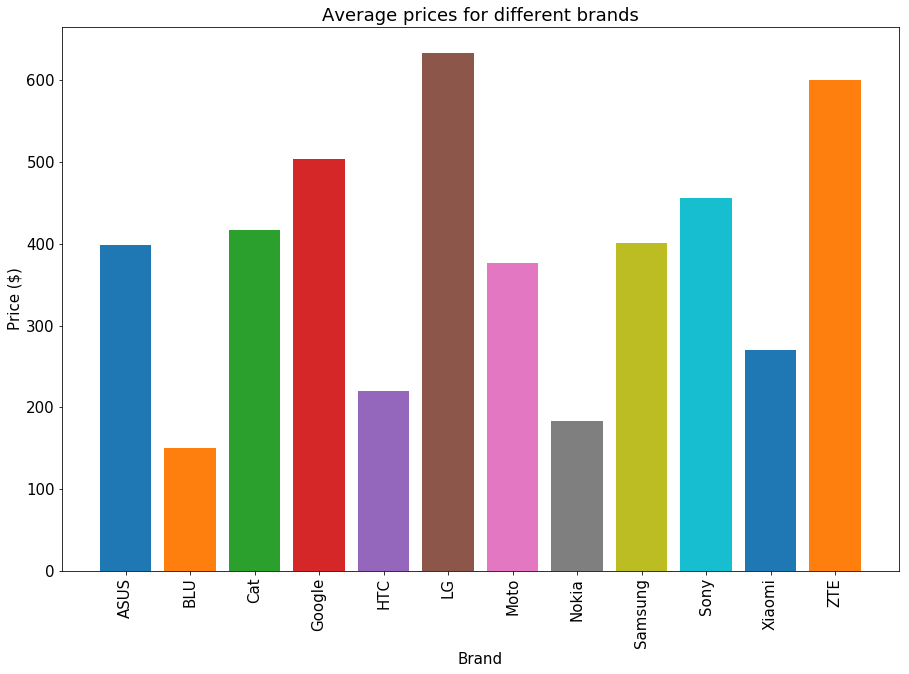

In [314]:
brands = list(avg_price['Brand'])

plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})

for i in brands:
    
    subset_price = avg_price[avg_price.Brand == i]
    labels = subset_price['Brand']
    price = subset_price['Price']
    plt.bar(labels + str(i), price, width = 0.8, label = str(i))
    
plt.title('Average prices for different brands') 
plt.xlabel('Brand')
plt.xticks(rotation = 90)
plt.ylabel('Price ($)')
plt.xticks(np.arange(len(avg_price['Brand'])), avg_price['Brand'])
plt.show()

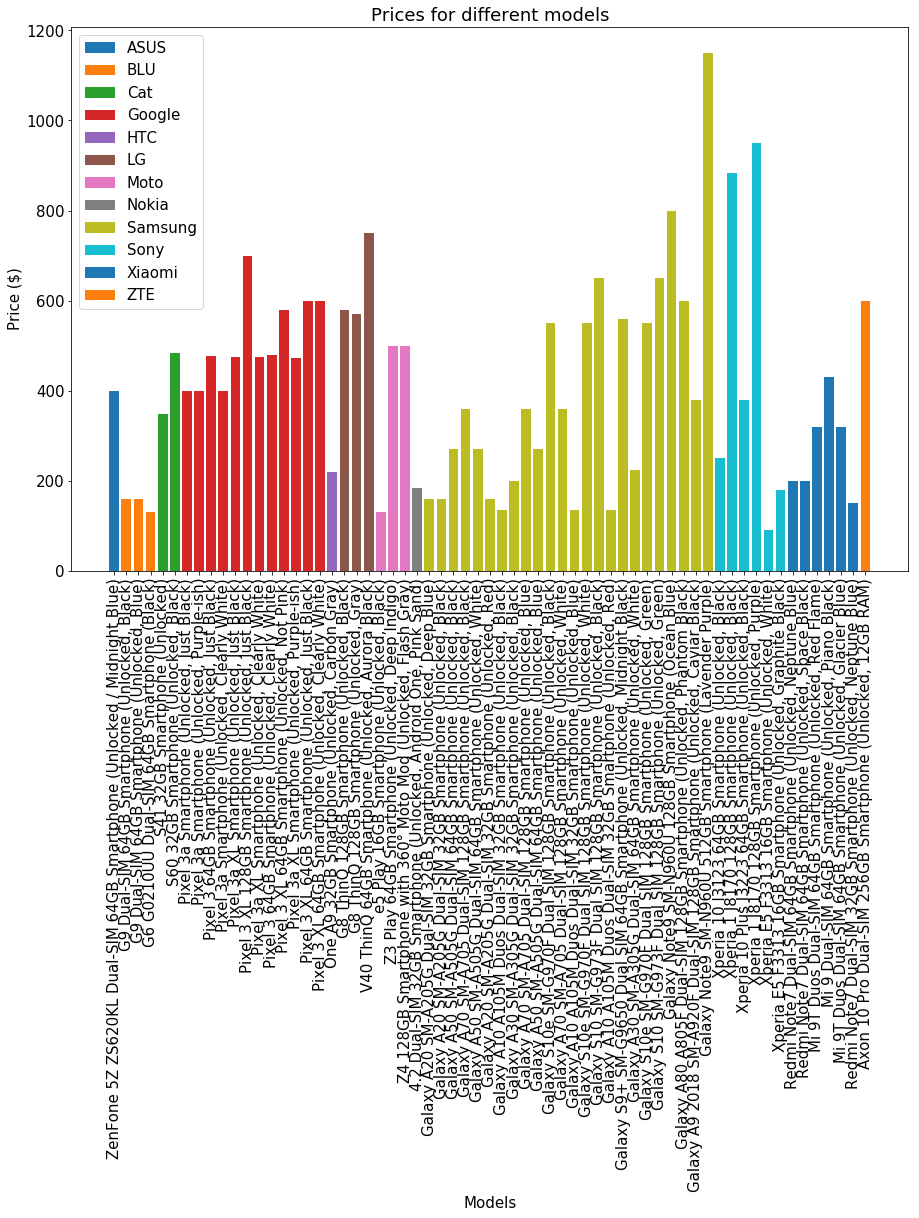

In [322]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 15})

for i in brands:
    
    subset_brand =modified_data1[modified_data1.Brand == i]
    plt.bar(subset_brand['Model'], subset_brand['Price'])
    
plt.title('Prices for different models') 
plt.xlabel('Models')
plt.xticks(rotation = 90)
plt.ylabel('Price ($)')
plt.legend(brands)
plt.show()